In [24]:
import os
import sys
import pathlib

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

import discorpy.losa.loadersaver as io
import discorpy.prep.preprocessing as prep
import discorpy.proc.processing as proc
import discorpy.post.postprocessing as post

In [25]:
def plot_image(arr):

    plt.figure()
    plt.imshow(arr, cmap='gray')
    plt.title(f"Image")
    plt.axis("off")    
    plt.show()    

In [26]:
file_name_grid0 = '/Users/decarlo/Downloads/fits/grid0.fts'
file_name_flat0 = '/Users/decarlo/Downloads/fits/flat0.fts'

In [27]:
with fits.open(file_name_grid0) as hdul:
    hdul.info()
    mat0 = hdul[0].data[ :, :]
    header= hdul[0].header   

with fits.open(file_name_flat0) as hdul:
    hdul.info()
    flat0 = hdul[0].data[ :, :]
    header= hdul[0].header 

Filename: /Users/decarlo/Downloads/fits/grid0.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (1280, 1024)   float32   
Filename: /Users/decarlo/Downloads/fits/flat0.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (1280, 1024)   float32   


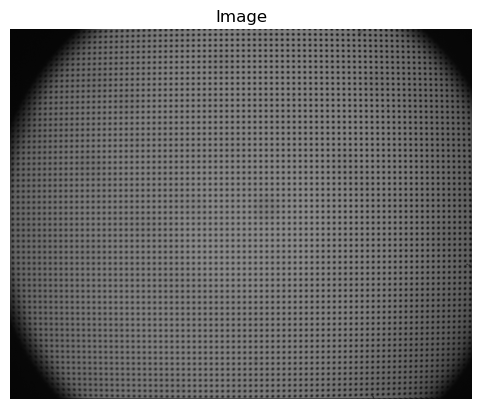

In [28]:
plot_image(mat0)

In [29]:
num_coef = 5  # Number of polynomial coefficients

In [17]:
(height, width) = mat0.shape
print(height, width)

1024 1280


In [47]:
# Correct non-uniform background.
mat1 = prep.normalization_fft(mat0, sigma=20)
# Segment dots
mat1 = prep.binarization(mat1)

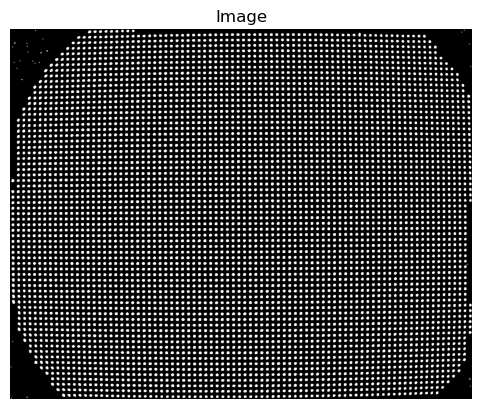

In [48]:
plot_image(mat1)

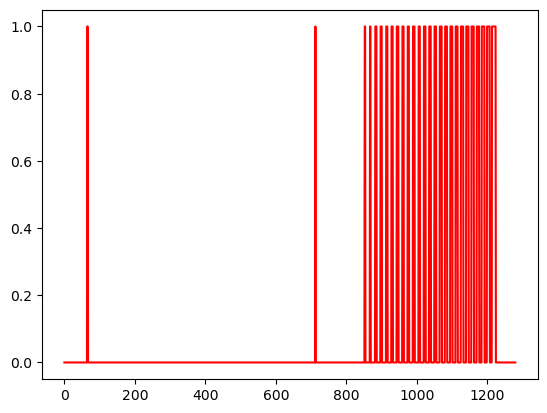

In [55]:
# plt.plot(mat1[502,:], color ="red") 

In [62]:
# Calculate the median dot size and distance between them.
print(mat1.shape)
(dot_size, dot_dist) = prep.calc_size_distance(mat1[300:800, 300:800])
print(dot_size, dot_dist)

(1024, 1280)
60.0 15.505416629330403


In [63]:
# plt.plot(mat1[500,:], color ="red") 

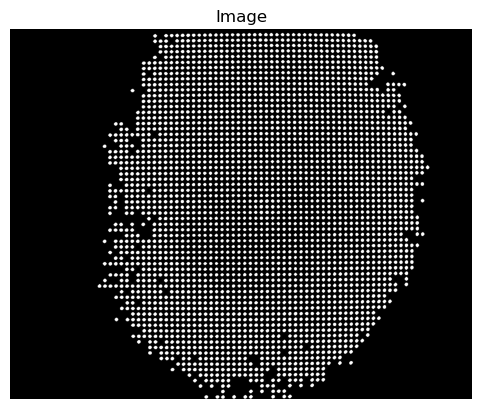

In [64]:
# Remove non-dot objects
mat1 = prep.select_dots_based_size(mat1, dot_size)
plot_image(mat1)

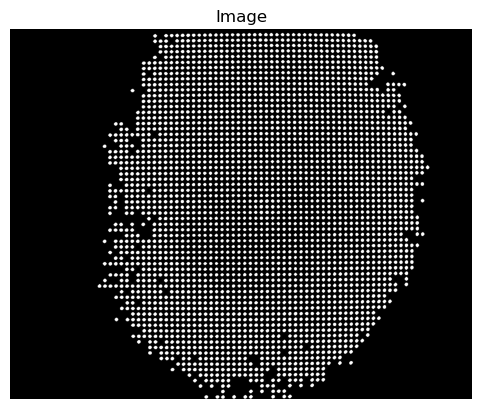

In [65]:
# Remove non-elliptical objects
mat1 = prep.select_dots_based_ratio(mat1)
plot_image(mat1)

In [66]:
# Calculate the slopes of horizontal lines and vertical lines.
hor_slope = prep.calc_hor_slope(mat1)
ver_slope = prep.calc_ver_slope(mat1)
print("Horizontal slope: {0}. Vertical slope {1}".format(hor_slope, ver_slope))

Horizontal slope: -0.0052774175579932085. Vertical slope 0.005350996257751768
